Import Library

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Membuat kelas untuk LDA

In [111]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1] #Variabel untuk Feature
        class_labels = np.unique(y) #Variabel untuk kelas (Target)

        # Rumus untuk Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)*transpose(X_c - mean_X_c) )

        # Rumus untuk Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)*transpose(mean_X_c - mean_overall))

        mean_overall = np.mean(X, axis=0) #Menentukan nilai mean overall
        # print("Mean Overall: ", mean_overall)
        SW = np.zeros((n_features, n_features)) #Membuat dimensi matriks untuk SW
        SB = np.zeros((n_features, n_features)) #Membuat dimensi matriks untuk SB
        for c in class_labels: 
            X_c = X[y == c] #Feature data yang dibuat menjadi matriks
            # print("x_c: \n",X_c)
            mean_c = np.mean(X_c, axis=0) #Menentukan mean untuk feature
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c ).T.dot((X_c - mean_c)) #Menentukan nilai SW
            # print("Minus:", minus)
            # print("SW1:",SW)

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0] #Menentukan nilai N
            # print("n_c",n_c)
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1) #Menentukan Mean Difference
            # print("Mean Diff: \n", mean_diff)
            SB += n_c * (mean_diff).dot(mean_diff.T) #Menentukan nilai SB
            # print("SB dalem: ",SB)
            # print("Mean C: \n", mean_c)

        
        print("SW:\n", SW) #Menampilkan nilai SW akhir
        print("SB:\n", SB) #Menampilkan nilai SB akhir

        # Mencari nilai SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        print("A:\n", A)
        # Menentukan eigenvalues dan eigenvectors dari SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, lakukan transpose untuk mempermudah
        # Urutkan eigenvalues dari tinggi hingga rendah
        eigenvectors = eigenvectors.T #Transpose eigenvectors
        idxs = np.argsort(abs(eigenvalues))[::-1] #Mengurutkan eigenvalues
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        print("Eigen Vector:\n",eigenvectors)
        print("Eigen Values\n", eigenvalues)
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

SW:
 [[ 6.5 -1.5]
 [-1.5  5. ]]
SB:
 [[0.25 0.5 ]
 [0.5  1.  ]]
A:
 [[0.0661157  0.1322314 ]
 [0.11983471 0.23966942]]
Eigen Vector:
 [[-0.48307734 -0.87557768]
 [-0.89442719  0.4472136 ]]
Eigen Values
 [0.30578512 0.        ]
Y = 
 [[-2.80788706 -3.13049517]
 [-4.46846542  0.        ]
 [-3.59288774 -0.4472136 ]
 [-5.91769745 -2.68328157]]
Shape of X: (4, 2)
Shape of transformed X: (4, 2)


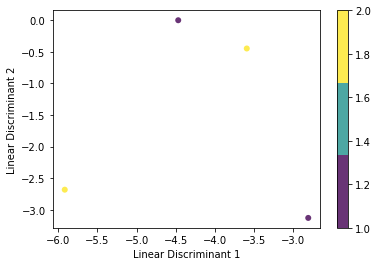

In [118]:
# Testing
if __name__ == "__main__":
    data = pd.read_csv("dataset2.csv") #Membaca Dataset
    X, y = data.drop("target", axis = 1), data.target
    X = np.array(X)

    # Project the data onto the 2 primary linear discriminants
    lda = LDA(2)
    lda.fit(X, y)
    X_projected = lda.transform(X)
    print("Y = \n", X_projected)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1, x2 = X_projected[:, 0], X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()
    plt.show()

SW:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]
SB:
 [[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]
A:
 [[ -3.05836939   1.08138264  -8.1119227   -3.45864987]
 [ -5.56163926   2.17821866 -14.96461194  -6.30773951]
 [  8.07743878  -2.94271854  21.5115909    9.14206468]
 [ 10.49708187  -3.41985449  27.54852482  11.84588007]]
Eigen Vector:
 [[-0.20874182 -0.38620369  0.55401172  0.7073504 ]
 [-0.00653196 -0.58661055  0.25256154 -0.76945309]
 [ 0.15169622  0.28172319  0.35490222 -0.87844448]
 [ 0.87924206 -0.32816889 -0.31374947 -0.1442215 ]]
Eigen Values
 [ 3.21919292e+01  2.85391043e-01 -9.19583748e-15 -1.60678244e-15]
Y = 
 [[-1.49920971 -1.88675441]
 [-1.2643595  -1.59214275]
 [-1.35525305 -1.73341462]
 [-1.18495616 -1

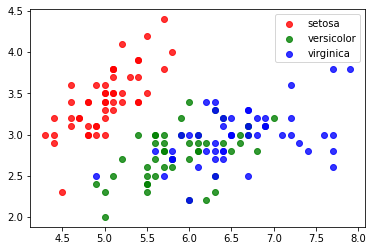

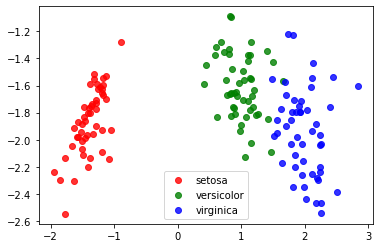

In [128]:
#Menggunakan Dataset IRIS
if __name__ == "__main__":
    from sklearn import datasets
    data = datasets.load_iris()
    X, y = data.data, data.target
    
    # Project the data onto the 2 primary linear discriminants
    lda = LDA(2)
    lda.fit(X, y)
    X_projected = lda.transform(X)
    print("Y = \n",X_projected)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    # x1, x2 = X_projected[:, 0], X_projected[:, 1]

    # plt.scatter(
    #     x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    # )

    # plt.xlabel("Linear Discriminant 1")
    # plt.ylabel("Linear Discriminant 2")
    # plt.colorbar()
    # plt.show()

    target_names = data.target_names
    # data_plot = model.fit(X, y).transform(X)

    #create LDA plot
    plt.figure()
    colors = ['red', 'green', 'blue']
    lw = 2
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], alpha=.8, color=color,
                    label=target_name)

    #add legend to plot
    plt.legend(loc='best', shadow=False, scatterpoints=1)

    #display LDA plot
    plt.show()

    #create LDA plot
    plt.figure()
    colors = ['red', 'green', 'blue']
    lw = 2
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_projected[y == i, 0], X_projected[y == i, 1], alpha=.8, color=color,
                    label=target_name)

    #add legend to plot
    plt.legend(loc='best', shadow=False, scatterpoints=1)

    #display LDA plot
    plt.show()
    

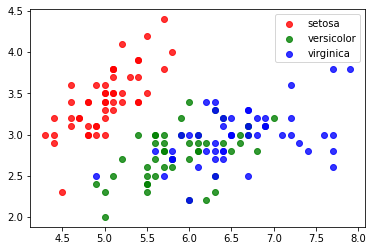

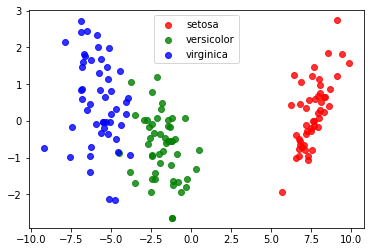

In [126]:
from sklearn import datasets
iris = datasets.load_iris()
# X, y = iris.data, iris.target
from matplotlib import pyplot as plt

# LDA
sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()